# **Data Pre-processing**

### **Import Libraries**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, silhouette_samples, silhouette_score, adjusted_rand_score, accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Circle, Ellipse, Polygon, Wedge, Arrow

import numpy as np
import pandas as pd
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Load Dataset**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/train_dataset.zip')
data.head()

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2


In [ ]:
data_backup = data
data_backup

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31578,14,23,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
31579,12,7,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2
31580,18,5,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2
31581,8,1,0.000001,10,1,0,0,1,0,1,0,0,0,0,0,0,3


### **Class Distribution Analysis**

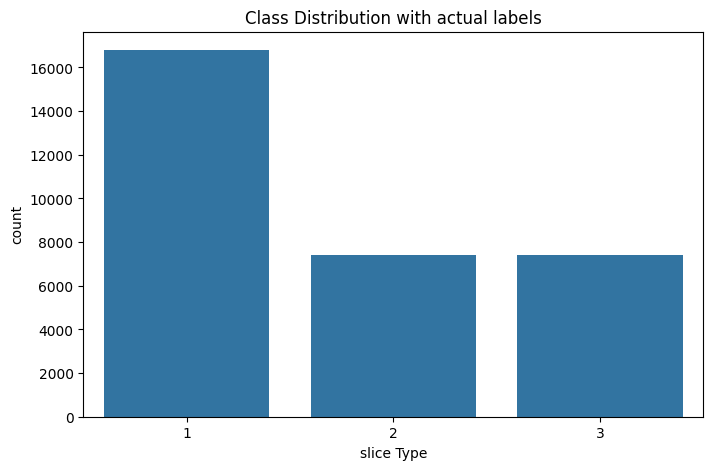

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['slice Type'])
plt.title('Class Distribution with actual labels')
plt.show()

#### Heatmaps

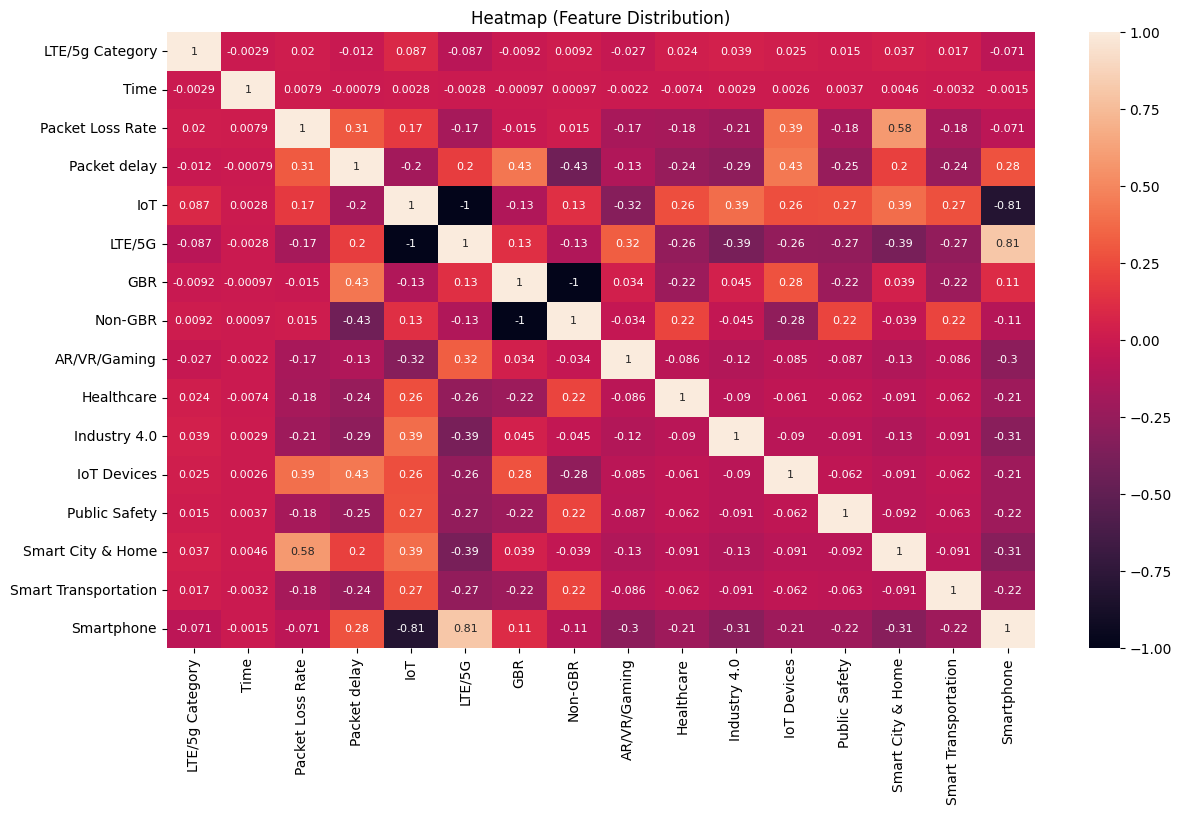

In [ ]:
# Create a heatmap for the correlation matrix of all features
plt.figure(figsize=(14, 8))
sns.heatmap(data.iloc[:, :-1].corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution)')
plt.show()

#### **Under Sampling - Class Imbalance Issue**

In [ ]:
# Random Seed for Under-sampling, Data-split and Modeling
a = 43
b = 43
c = 40

In [ ]:
print(a)

43


In [ ]:
# Identify the majority class
majority_class = data['slice Type'].value_counts().idxmax()
print("Majority Class: ", majority_class)

# Count the number of data points in the majority class
majority_count = data['slice Type'].value_counts()[majority_class]
print("Majority Class Count: ", majority_count)

# Count the number of data points in the other two classes
minority_count = data['slice Type'].value_counts().min()
print("Minority Class Count: ", minority_count)

# Calculate the number of data points to remove from the majority class
num_to_remove = majority_count - minority_count
print("Amount of Data to be removed: ", num_to_remove)

# Randomly select data points from the majority class to remove
majority_indices = data[data['slice Type'] == majority_class].index
np.random.seed(a)
remove_indices = np.random.choice(majority_indices, size=num_to_remove, replace=False)
print("Indices to be removed: \n", remove_indices[:100])

# Remove the selected data points from the DataFrame
balanced_data = data.drop(remove_indices)

Majority Class:  1
Majority Class Count:  16799
Minority Class Count:  7392
Amount of Data to be removed:  9407
Indices to be removed: 
 [19925  9148  6338 14968  1512 18831 17608 20020  3042 27275 10734    63
  2361 14818 19344 12033 30022 23899 16534 29576 21746 23835 30078 18186
 20030 22645 11189 27117 14865 15729  2254  5110  3177  6155 28694  3151
  6910 29158 22864 20428  4979  2862 13880 11215 25625 17460  6873 10010
 14421  5212 28572 13497  1466 29538 13096 11918 20277 24331 10335 26030
 16378 14931 22589 16236 22688 27044  5204 19981  9957 16487 19276 19380
 24728 10866  9064  5783  9060   918  9541  3758 13811 15028  2755 28203
 11658 20093 19332 22277 30700   955 30398  5249 16335 24022 28400 15650
  3267  8488 27698  9212]


In [ ]:
data = balanced_data
data.head(20)

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2
5,19,2,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0,3
6,15,2,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2
9,13,10,0.001000,150,0,1,0,1,0,0,0,0,0,0,0,1,1
11,7,17,0.000001,10,1,0,0,1,0,1,0,0,0,0,0,0,3
12,7,3,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2
13,4,14,0.000001,300,0,1,1,0,0,0,0,0,0,0,0,1,1
14,15,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
17,9,20,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,3


In [ ]:
data = data.reset_index(drop=True)
data.head(20)

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2
2,19,2,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0,3
3,15,2,0.010000,300,1,0,1,0,0,0,0,1,0,0,0,0,2
4,13,10,0.001000,150,0,1,0,1,0,0,0,0,0,0,0,1,1
5,7,17,0.000001,10,1,0,0,1,0,1,0,0,0,0,0,0,3
6,7,3,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2
7,4,14,0.000001,300,0,1,1,0,0,0,0,0,0,0,0,1,1
8,15,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
9,9,20,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0,3


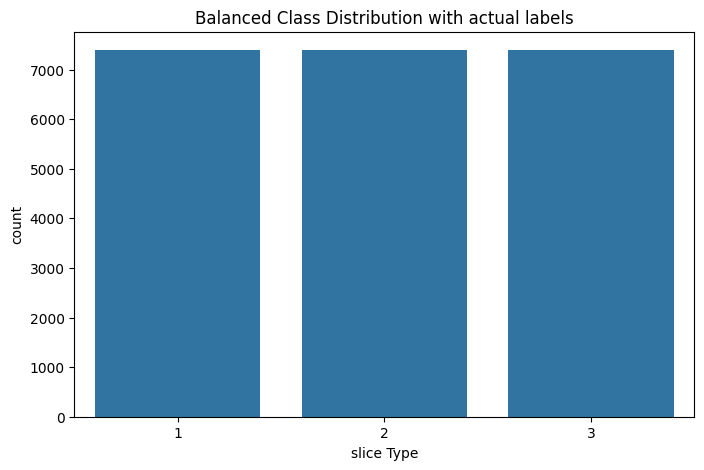

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['slice Type'])
plt.title('Balanced Class Distribution with actual labels')
plt.show()

#### Heatmaps

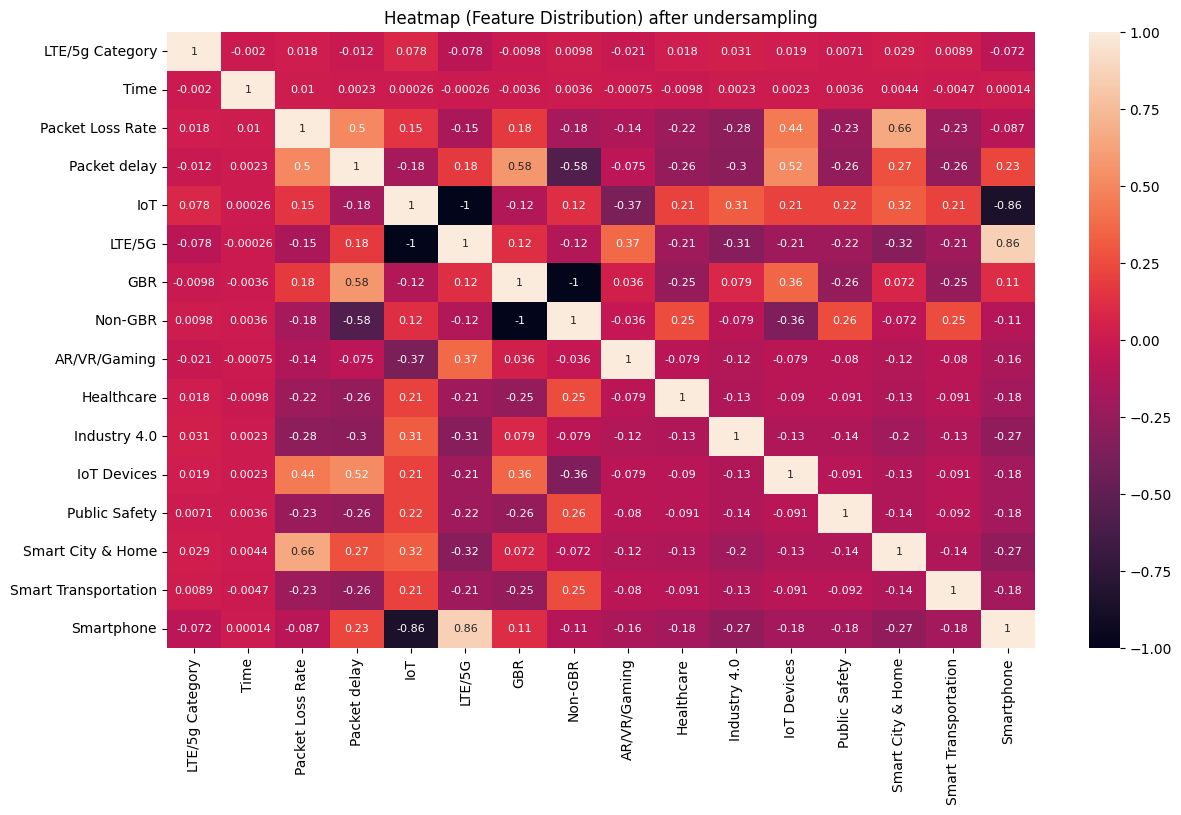

In [ ]:
# Create a heatmap for the correlation matrix of all features after undersampling
plt.figure(figsize=(14, 8))
sns.heatmap(data.iloc[:, :-1].corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution) after undersampling')
plt.show()

### **Relevant Feature Selection**

In [ ]:
# Select relevant features for clustering (excluding LTE/5g Category and Time)
# X = data.drop(['LTE/5g Category', 'Time'], axis=1)
# features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR', 'AR/VR/Gaming',	'Healthcare',	'Industry 4.0', 'IoT Devices',	'Public Safety',	'Smart City & Home',	'Smart Transportation',	'Smartphone']
features = ['Packet Loss Rate', 'Packet delay', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'IoT',	'LTE/5G',	'GBR',	'Non-GBR']
# features = ['Packet Loss Rate', 'Packet delay']
# features = ['Packet Loss Rate']

#### Heatmaps

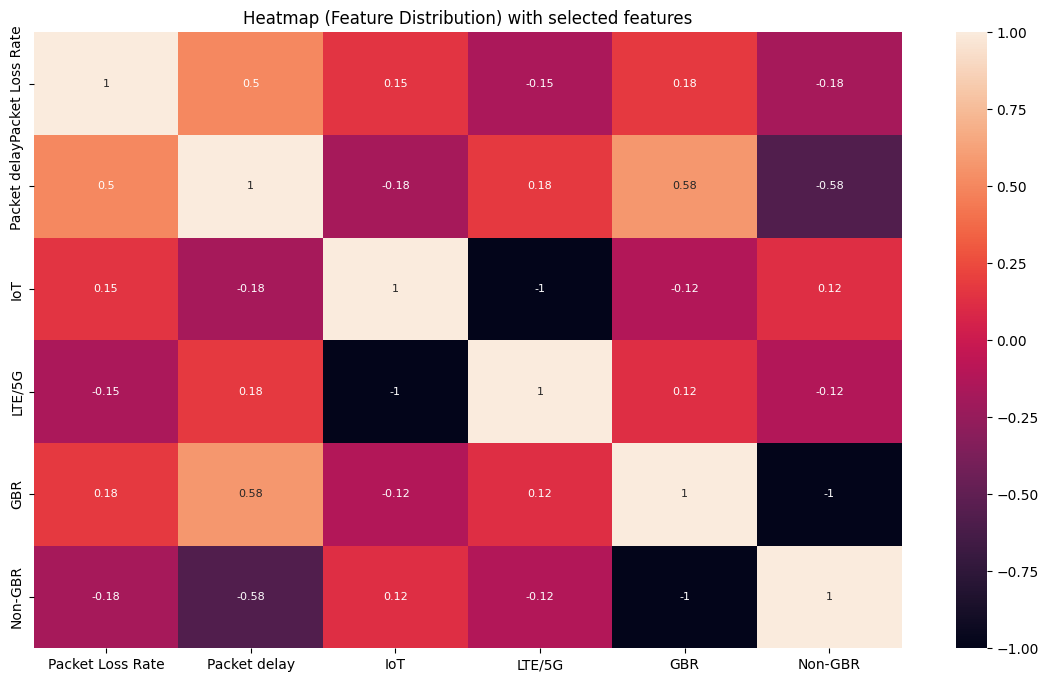

In [ ]:
# Create a heatmap for the correlation matrix of all selected features
plt.figure(figsize=(14, 8))
sns.heatmap(data[features].corr(), annot=True, annot_kws={"size": 8})
plt.title('Heatmap (Feature Distribution) with selected features')
plt.show()

### **Define X and y**

In [ ]:
X = data[features]
X

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
0,0.000001,10,1,0,0,1
1,0.010000,50,1,0,0,1
2,0.000001,10,1,0,0,1
3,0.010000,300,1,0,1,0
4,0.001000,150,0,1,0,1
...,...,...,...,...,...,...
22171,0.010000,50,1,0,0,1
22172,0.010000,50,1,0,0,1
22173,0.010000,300,1,0,1,0
22174,0.000001,10,1,0,0,1


In [ ]:
y = data['slice Type']

### **Apply t-sne to X**

In [ ]:
X_backup = X
X_backup

,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR
0,0.000001,10,1,0,0,1
1,0.010000,50,1,0,0,1
2,0.000001,10,1,0,0,1
3,0.010000,300,1,0,1,0
4,0.001000,150,0,1,0,1
...,...,...,...,...,...,...
22171,0.010000,50,1,0,0,1
22172,0.010000,50,1,0,0,1
22173,0.010000,300,1,0,1,0
22174,0.000001,10,1,0,0,1


In [ ]:
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
X_tsne = tsne.fit_transform(X)
X_tsne

array([[-116.47588  ,    1.5351418],
       [ -62.686787 , -174.82942  ],
       [-116.47588  ,    1.5351418],
       ...,
       [ 151.37463  ,  -82.24084  ],
       [-116.47588  ,    1.5351418],
       [-116.47588  ,    1.5351418]], dtype=float32)

In [ ]:
X = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1]})
X

,Feature 1,Feature 2
0,-116.475883,1.535142
1,-62.686787,-174.829422
2,-116.475883,1.535142
3,151.374634,-82.240837
4,129.365646,48.896378
...,...,...
22171,-62.686787,-174.829422
22172,-62.686787,-174.829422
22173,151.374634,-82.240837
22174,-116.475883,1.535142


#### Pair Plots

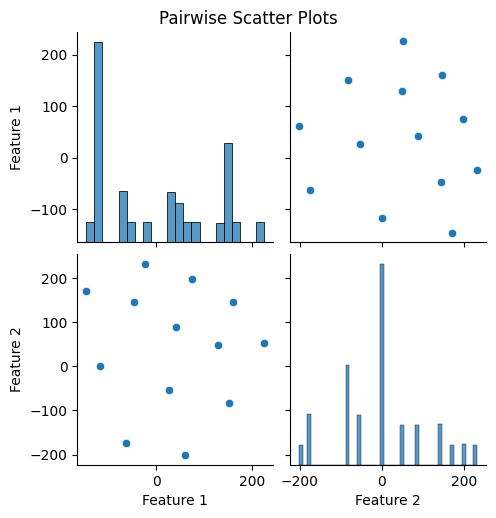

In [ ]:
sns.pairplot(X)
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

In [ ]:
data = pd.DataFrame({'Feature 1': X_tsne[:, 0], 'Feature 2': X_tsne[:, 1], 'slice Type': y})
data

,Feature 1,Feature 2,slice Type
0,-116.475883,1.535142,3
1,-62.686787,-174.829422,2
2,-116.475883,1.535142,3
3,151.374634,-82.240837,2
4,129.365646,48.896378,1
...,...,...,...
22171,-62.686787,-174.829422,2
22172,-62.686787,-174.829422,2
22173,151.374634,-82.240837,2
22174,-116.475883,1.535142,3


In [ ]:
features = ['Feature 1', 'Feature 2']

### **Ground Truth Calculation**

#### **Ground Truth Slice 1**

In [ ]:
# Group data by label "slice 1"
grouped_data_slice1 = data[data['slice Type'] == 1]
grouped_data_slice1

,Feature 1,Feature 2,slice Type
4,129.365646,48.896378,1
7,160.844345,145.959091,1
8,41.061153,88.802460,1
11,-146.252502,171.272171,1
18,225.824219,52.291756,1
...,...,...,...
22163,-146.252502,171.272171,1
22164,-47.319092,144.531418,1
22167,129.365646,48.896378,1
22169,41.061153,88.802460,1


In [ ]:
# Create 14-dimensional vectors
grouped_data_slice1_vec = grouped_data_slice1[features].values
grouped_data_slice1_vec

array([[129.36565 ,  48.896378],
       [160.84435 , 145.95909 ],
       [ 41.061153,  88.80246 ],
       ...,
       [129.36565 ,  48.896378],
       [ 41.061153,  88.80246 ],
       [160.84435 , 145.95909 ]], dtype=float32)

In [ ]:
# Calculate Average
GT_slice1 = np.mean(grouped_data_slice1_vec, axis=0)
GT_slice1

array([51.848503, 97.29763 ], dtype=float32)

#### **Ground Truth Slice 2**

In [ ]:
# Group data by label "slice 2"
grouped_data_slice2 = data[data['slice Type'] == 2]
grouped_data_slice2

,Feature 1,Feature 2,slice Type
1,-62.686787,-174.829422,2
3,151.374634,-82.240837,2
6,-62.686787,-174.829422,2
15,-62.686787,-174.829422,2
25,26.013721,-54.010548,2
...,...,...,...
22162,-62.686787,-174.829422,2
22165,151.374634,-82.240837,2
22171,-62.686787,-174.829422,2
22172,-62.686787,-174.829422,2


In [ ]:
# Create 14-dimensional vectors
grouped_data_slice2_vec = grouped_data_slice2[features].values
grouped_data_slice2_vec

array([[ -62.686787, -174.82942 ],
       [ 151.37463 ,  -82.24084 ],
       [ -62.686787, -174.82942 ],
       ...,
       [ -62.686787, -174.82942 ],
       [ -62.686787, -174.82942 ],
       [ 151.37463 ,  -82.24084 ]], dtype=float32)

In [ ]:
# Calculate Average
GT_slice2 = np.mean(grouped_data_slice2_vec, axis=0)
GT_slice2

array([ 65.6263 , -98.73888], dtype=float32)

#### **Ground Truth Slice 3**

In [ ]:
# Group data by label "slice 3"
grouped_data_slice3 = data[data['slice Type'] == 3]
grouped_data_slice3

,Feature 1,Feature 2,slice Type
0,-116.475883,1.535142,3
2,-116.475883,1.535142,3
5,-116.475883,1.535142,3
9,-116.475883,1.535142,3
10,-116.475883,1.535142,3
...,...,...,...
22156,-116.475883,1.535142,3
22166,-116.475883,1.535142,3
22168,-116.475883,1.535142,3
22174,-116.475883,1.535142,3


In [ ]:
# Create 14-dimensional vectors
grouped_data_slice3_vec = grouped_data_slice3[features].values
grouped_data_slice3_vec

array([[-116.47588  ,    1.5351418],
       [-116.47588  ,    1.5351418],
       [-116.47588  ,    1.5351418],
       ...,
       [-116.47588  ,    1.5351418],
       [-116.47588  ,    1.5351418],
       [-116.47588  ,    1.5351418]], dtype=float32)

In [ ]:
# Calculate Average
GT_slice3 = np.mean(grouped_data_slice3_vec, axis=0)
GT_slice3

array([-116.47587  ,    1.5351417], dtype=float32)

#### **Plot Ground Truth**

In [ ]:
# Combine the centroids into a single array
GT_centroids = np.vstack((GT_slice1, GT_slice2, GT_slice3))
GT_centroids

array([[  51.848503 ,   97.29763  ],
       [  65.6263   ,  -98.73888  ],
       [-116.47587  ,    1.5351417]], dtype=float32)

In [ ]:
# Testing the for loop
for cluster in range(1, len(np.unique(data['slice Type']))+1):
    cluster_data = data[data['slice Type'] == cluster]
    print(cluster, "\n",cluster_data, "\n")

1 
         Feature 1   Feature 2  slice Type
4      129.365646   48.896378           1
7      160.844345  145.959091           1
8       41.061153   88.802460           1
11    -146.252502  171.272171           1
18     225.824219   52.291756           1
...           ...         ...         ...
22163 -146.252502  171.272171           1
22164  -47.319092  144.531418           1
22167  129.365646   48.896378           1
22169   41.061153   88.802460           1
22170  160.844345  145.959091           1

[7392 rows x 3 columns] 

2 
         Feature 1   Feature 2  slice Type
1      -62.686787 -174.829422           2
3      151.374634  -82.240837           2
6      -62.686787 -174.829422           2
15     -62.686787 -174.829422           2
25      26.013721  -54.010548           2
...           ...         ...         ...
22162  -62.686787 -174.829422           2
22165  151.374634  -82.240837           2
22171  -62.686787 -174.829422           2
22172  -62.686787 -174.829422           2

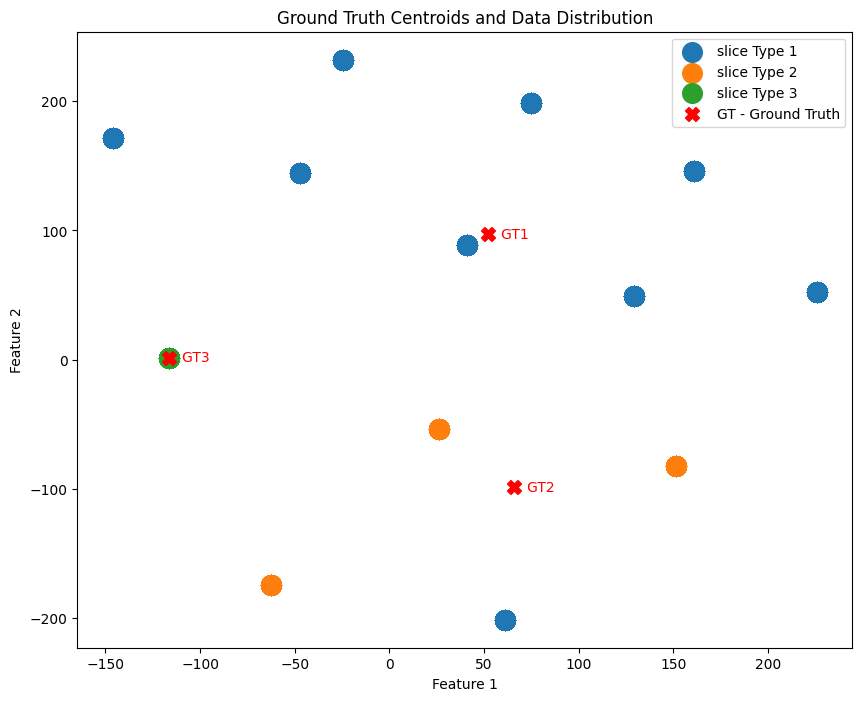

In [ ]:
# Plot the scatter plot with different colors for each class
plt.figure(figsize=(10, 8))
for cluster in range(1, len(np.unique(data['slice Type']))+1):
    cluster_data = data[data['slice Type'] == cluster]
    plt.scatter(cluster_data[data.columns[0]], cluster_data[data.columns[1]], s=200, label=f'slice Type {cluster}')

# Plot the Ground Truth Centroids
plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
for i, centroid in enumerate(GT_centroids):
    plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Ground Truth Centroids and Data Distribution')
plt.legend()
# plt.xlim(-200, 200)  # Set your desired x-axis range
# plt.ylim(-200, 200)  # Set your desired y-axis range
plt.show()

### **Datasplit - X, X_train and X_test**

In [ ]:
print(b)

43


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=b)
X_train

,Feature 1,Feature 2
18095,151.374634,-82.240837
3044,151.374634,-82.240837
14188,151.374634,-82.240837
7705,-116.475883,1.535142
1933,-62.686787,-174.829422
...,...,...
18448,-116.475883,1.535142
7985,26.013721,-54.010548
18687,-62.686787,-174.829422
19776,129.365646,48.896378


In [ ]:
X_test

,Feature 1,Feature 2
641,41.061153,88.802460
7239,-116.475883,1.535142
9593,151.374634,-82.240837
4455,151.374634,-82.240837
17270,-116.475883,1.535142
...,...,...
426,26.013721,-54.010548
17176,-47.319092,144.531418
18203,151.374634,-82.240837
1183,-116.475883,1.535142


In [ ]:
y_train

18095    2
3044     2
14188    2
7705     3
1933     2
        ..
18448    3
7985     2
18687    2
19776    1
14148    3
Name: slice Type, Length: 19958, dtype: int64

In [ ]:
y_test

641      1
7239     3
9593     2
4455     2
17270    3
        ..
426      2
17176    1
18203    2
1183     3
14397    1
Name: slice Type, Length: 2218, dtype: int64

# **Data Modelling and Analysis**

## **Model Training**

In [ ]:
print(c)

40


In [ ]:
# Create a KMeans model
kmeans_model = KMeans(n_clusters=3, random_state=c)

# Fit the model to the training data
best_model = kmeans_model.fit(X_train)
best_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=40)

## **Hyperparameter Tuning**

In [ ]:
# # Initialize KMeans model
# kmeans = KMeans()

# # Define hyperparameters to tune
# param_grid = {
#     'init': ['k-means++', 'random'],
#     'n_clusters': [3],
#     'max_iter': [50, 100, 200, 300],
#     # 'tol': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6],
#     # 'tol': [1e-6],
#     'algorithm': ['auto', 'full'],
#     # 'n_jobs': [-1],  # Use all available CPU cores
#     'random_state': [42]
# }

# # Perform GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(kmeans, param_grid, cv=10, scoring='neg_mean_squared_error')
# grid_search.fit(X_train)

# # Get best hyperparameters and model
# best_params = grid_search.best_params_
# best_model = grid_search.best_estimator_

# # Print best hyperparameters
# print("\n\nBest Hyperparameters:")
# print(best_params)

# # Print best model
# print("\nBest Model:")
# best_model

## **Model Labels**

In [ ]:
kmeans_model_labels = best_model.labels_
kmeans_model_labels

array([1, 1, 1, ..., 1, 0, 2], dtype=int32)

In [ ]:
kmeans_model_labels_aligned = kmeans_model_labels + 1
kmeans_model_labels_aligned

array([2, 2, 2, ..., 2, 1, 3], dtype=int32)

In [ ]:
len(kmeans_model_labels_aligned)

19958

In [ ]:
np.unique(kmeans_model_labels_aligned)

array([1, 2, 3], dtype=int32)

## **Model Centroids**

In [ ]:
kmeans_model_centroids = best_model.cluster_centers_
kmeans_model_centroids

array([[  75.50642 ,  125.83458 ],
       [  65.21242 , -108.48932 ],
       [-119.23324 ,   17.229391]], dtype=float32)

In [ ]:
C1 = kmeans_model_centroids[0]
C1

array([ 75.50642, 125.83458], dtype=float32)

In [ ]:
C2 = kmeans_model_centroids[1]
C2

array([  65.21242, -108.48932], dtype=float32)

In [ ]:
C3 = kmeans_model_centroids[2]
C3

array([-119.23324 ,   17.229391], dtype=float32)

In [ ]:
arr = np.array([[0.0, 0.0], [0.0, 0.0], [0.0, 0.0]]).astype(np.float32)
arr
arr.dtype

dtype('float32')

#### **Plot Model Centroids**

In [ ]:
# Get the column names from the original DataFrame
X_train_column_names = X_train.columns.tolist()

# Convert X_test to a pandas DataFrame
X_train_df = pd.DataFrame(X_train, columns=X_train_column_names)  # Replace X_test_column_names with your actual column names
X_train_with_cluster_labels = X_train_df.copy()  # Create a copy to avoid modifying the original DataFrame

# Include the 'labels' as a new column in the DataFrame
X_train_with_cluster_labels['cluster_label'] = kmeans_model_labels_aligned
X_train_with_cluster_labels

,Feature 1,Feature 2,cluster_label
18095,151.374634,-82.240837,2
3044,151.374634,-82.240837,2
14188,151.374634,-82.240837,2
7705,-116.475883,1.535142,3
1933,-62.686787,-174.829422,2
...,...,...,...
18448,-116.475883,1.535142,3
7985,26.013721,-54.010548,2
18687,-62.686787,-174.829422,2
19776,129.365646,48.896378,1


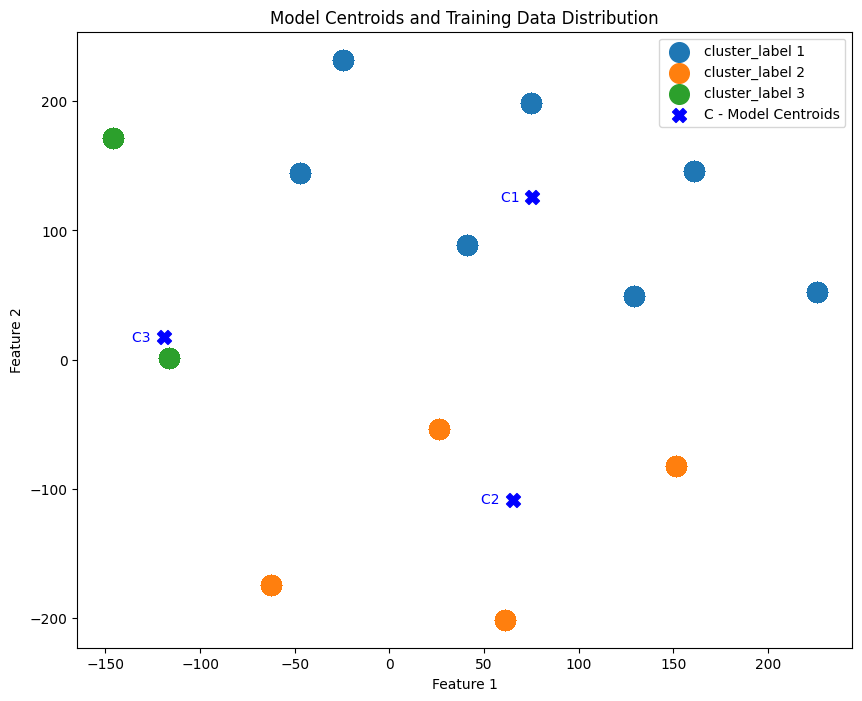

In [ ]:
# Plot the scatter plot with different colors for the training data
plt.figure(figsize=(10, 8))
for cluster in range(1, len(np.unique(kmeans_model_labels_aligned))+1):
    cluster_data_train = X_train_with_cluster_labels[X_train_with_cluster_labels['cluster_label'] == cluster]
    plt.scatter(cluster_data_train[data.columns[0]], cluster_data_train[data.columns[1]], s=200, label=f'cluster_label {cluster}')

# Plot the Model Centroids
plt.scatter(kmeans_model_centroids[:, 0], kmeans_model_centroids[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
for i, centroid in enumerate(kmeans_model_centroids):
    plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Model Centroids and Training Data Distribution')
plt.legend()
# plt.xlim(-150, 150)  # Set your desired x-axis range
# plt.ylim(-150, 150)  # Set your desired y-axis range
plt.show()

## **Minimum Distance of C1 from Ground Truths**

In [ ]:
dist_C1_GT_slice1 = np.linalg.norm(C1 - GT_slice1)
dist_C1_GT_slice1

37.068237

In [ ]:
dist_C1_GT_slice2 = np.linalg.norm(C1 - GT_slice2)
dist_C1_GT_slice2

224.7907

In [ ]:
dist_C1_GT_slice3 = np.linalg.norm(C1 - GT_slice3)
dist_C1_GT_slice3

228.70844

In [ ]:
# Determine the closest centroid
min_dist_C1 = min(dist_C1_GT_slice1, dist_C1_GT_slice2, dist_C1_GT_slice3)

if min_dist_C1 == dist_C1_GT_slice1:
    closest_centroid_C1 = "Slice 1"
    arr[0] = C1
elif min_dist_C1 == dist_C1_GT_slice2:
    closest_centroid_C1 = "Slice 2"
    arr[0] = C2
else:
    closest_centroid_C1 = "Slice 3"
    arr[0] = C3

print("C1 has minimum distance of ", min_dist_C1, "from the Model's Centroid/Cluster", closest_centroid_C1)
arr

C1 has minimum distance of  37.068237 from the Model's Centroid/Cluster Slice 1


array([[ 75.50642, 125.83458],
       [  0.     ,   0.     ],
       [  0.     ,   0.     ]], dtype=float32)

## **Minimum Distance of C2 from Ground Truths**

In [ ]:
dist_C2_GT_slice1 = np.linalg.norm(C2 - GT_slice1)
dist_C2_GT_slice1

206.22043

In [ ]:
dist_C2_GT_slice2 = np.linalg.norm(C2 - GT_slice2)
dist_C2_GT_slice2

9.759223

In [ ]:
dist_C2_GT_slice3 = np.linalg.norm(C2 - GT_slice3)
dist_C2_GT_slice3

212.40532

In [ ]:
# Determine the closest centroid
min_dist_C2 = min(dist_C2_GT_slice1, dist_C2_GT_slice2, dist_C2_GT_slice3)

if min_dist_C2 == dist_C2_GT_slice1:
    closest_centroid_C2 = "Slice 1"
    arr[1] = C1
elif min_dist_C2 == dist_C2_GT_slice2:
    closest_centroid_C2 = "Slice 2"
    arr[1] = C2
else:
    closest_centroid_C2 = "Slice 3"
    arr[1] = C3

print("C2 has minimum distance of ", min_dist_C2, "from the Model's Centroid/Cluster", closest_centroid_C2)
arr

C2 has minimum distance of  9.759223 from the Model's Centroid/Cluster Slice 2


array([[  75.50642,  125.83458],
       [  65.21242, -108.48932],
       [   0.     ,    0.     ]], dtype=float32)

## **Minimum Distance of C3 from Ground Truths**

In [ ]:
dist_C3_GT_slice1 = np.linalg.norm(C3 - GT_slice1)
dist_C3_GT_slice1

188.8912

In [ ]:
dist_C3_GT_slice2 = np.linalg.norm(C3 - GT_slice2)
dist_C3_GT_slice2

218.22394

In [ ]:
dist_C3_GT_slice3 = np.linalg.norm(C3 - GT_slice3)
dist_C3_GT_slice3

15.934633

In [ ]:
# Determine the closest centroid
min_dist_C3 = min(dist_C3_GT_slice1, dist_C3_GT_slice2, dist_C3_GT_slice3)

if min_dist_C3 == dist_C3_GT_slice1:
    closest_centroid_C3 = "Slice 1"
    arr[2] = C1
elif min_dist_C3 == dist_C3_GT_slice2:
    closest_centroid_C3 = "Slice 2"
    arr[2] = C2
else:
    closest_centroid_C3 = "Slice 3"
    arr[2] = C3

print("C3 has minimum distance of ", min_dist_C3, "from the Model's Centroid/Cluster", closest_centroid_C3)
arr

C3 has minimum distance of  15.934633 from the Model's Centroid/Cluster Slice 3


array([[  75.50642 ,  125.83458 ],
       [  65.21242 , -108.48932 ],
       [-119.23324 ,   17.229391]], dtype=float32)

## **Model Centroids Mapping to Labels**

In [ ]:
print("C1 has minimum distance of ", min_dist_C1, "from the Model's Centroid/Cluster", closest_centroid_C1)
print("C2 has minimum distance of ", min_dist_C2, "from the Model's Centroid/Cluster", closest_centroid_C2)
print("C3 has minimum distance of ", min_dist_C3, "from the Model's Centroid/Cluster", closest_centroid_C3)

C1 has minimum distance of  37.068237 from the Model's Centroid/Cluster Slice 1
C2 has minimum distance of  9.759223 from the Model's Centroid/Cluster Slice 2
C3 has minimum distance of  15.934633 from the Model's Centroid/Cluster Slice 3


### **Before Mapping the Labels**

In [ ]:
kmeans_model

KMeans(n_clusters=3, random_state=40)

In [ ]:
kmeans_model_centroids

array([[  75.50642 ,  125.83458 ],
       [  65.21242 , -108.48932 ],
       [-119.23324 ,   17.229391]], dtype=float32)

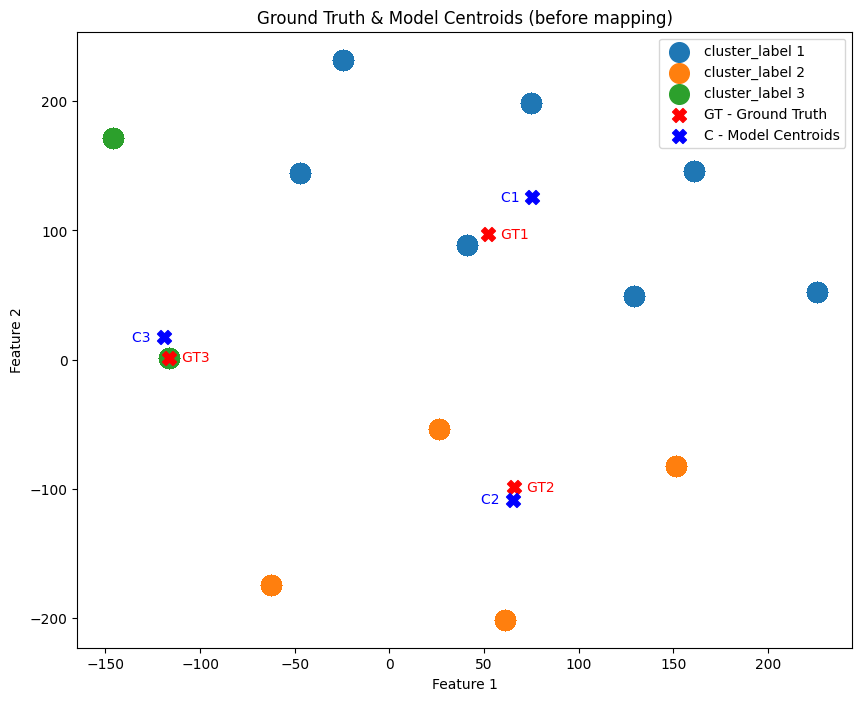

In [ ]:
# Plot the scatter plot with different colors for the training data
plt.figure(figsize=(10, 8))
for cluster in range(1, len(np.unique(kmeans_model_labels_aligned))+1):
    cluster_data_train = X_train_with_cluster_labels[X_train_with_cluster_labels['cluster_label'] == cluster]
    plt.scatter(cluster_data_train[data.columns[0]], cluster_data_train[data.columns[1]], s=200, label=f'cluster_label {cluster}')

# Plot the Ground Truth Centroids
plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
for i, centroid in enumerate(GT_centroids):
    plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

# Plot the Model Centroids
plt.scatter(kmeans_model_centroids[:, 0], kmeans_model_centroids[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
for i, centroid in enumerate(kmeans_model_centroids):
    plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Ground Truth & Model Centroids (before mapping)')
plt.legend()
# plt.xlim(-150, 150)  # Set your desired x-axis range
# plt.ylim(-150, 150)  # Set your desired y-axis range
plt.show()

### **After Mapping the Labels**

In [ ]:
kmeans_model_mod = kmeans_model
kmeans_model_mod

KMeans(n_clusters=3, random_state=40)

In [ ]:
kmeans_model_mod.cluster_centers_ = arr

In [ ]:
kmeans_model_centroids_mapped = kmeans_model_mod.cluster_centers_
kmeans_model_centroids_mapped

array([[  75.50642 ,  125.83458 ],
       [  65.21242 , -108.48932 ],
       [-119.23324 ,   17.229391]], dtype=float32)

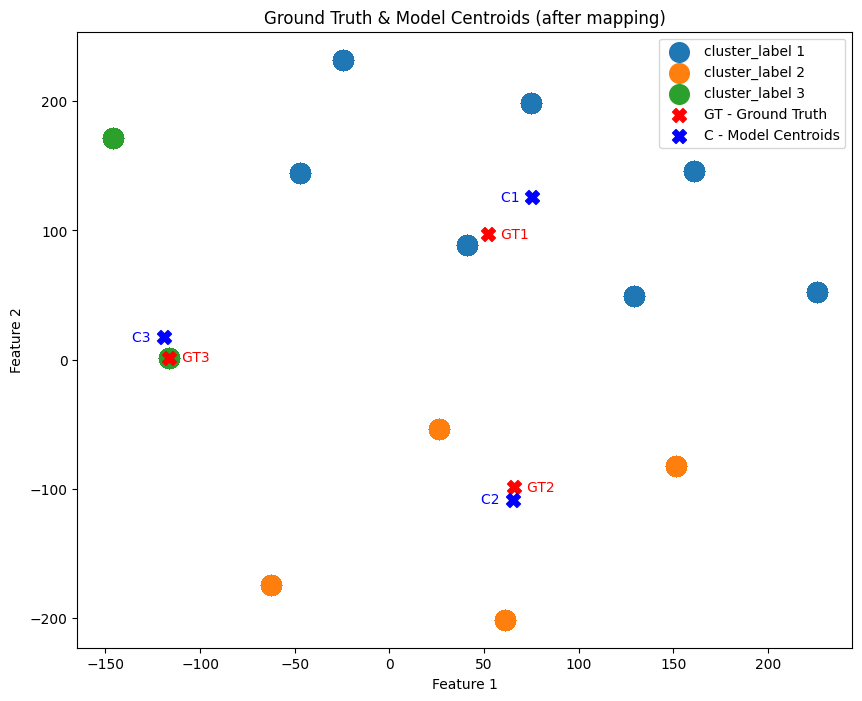

In [ ]:
# Plot the scatter plot with different colors for the training data
plt.figure(figsize=(10, 8))
for cluster in range(1, len(np.unique(kmeans_model_labels_aligned))+1):
    cluster_data_train = X_train_with_cluster_labels[X_train_with_cluster_labels['cluster_label'] == cluster]
    plt.scatter(cluster_data_train[data.columns[0]], cluster_data_train[data.columns[1]], s=200, label=f'cluster_label {cluster}')

# sns.scatterplot(x=data.columns[0], y=data.columns[1], hue=X_train_with_cluster_labels['cluster_label'], data=X_train_with_cluster_labels, palette='Set1', s=200)

# Plot the Ground Truth Centroids
plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
for i, centroid in enumerate(GT_centroids):
    plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

# Plot the Model Centroids
plt.scatter(kmeans_model_centroids_mapped[:, 0], kmeans_model_centroids_mapped[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
for i, centroid in enumerate(kmeans_model_centroids_mapped):
    plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Ground Truth & Model Centroids (after mapping)')
plt.legend()
# plt.xlim(-150, 150)  # Set your desired x-axis range
# plt.ylim(-150, 150)  # Set your desired y-axis range
plt.show()

# **Model Testing**

In [ ]:
# Predict the labels for the test data
# y_pred = kmeans_model.predict(X_test)
y_pred = kmeans_model_mod.predict(X_test)
y_pred

array([0, 2, 1, ..., 1, 2, 0], dtype=int32)

In [ ]:
y_pred_aligned = y_pred + 1
y_pred_aligned

array([1, 3, 2, ..., 2, 3, 1], dtype=int32)

In [ ]:
len(y_pred_aligned)

2218

In [ ]:
np.unique(y_pred_aligned)

array([1, 2, 3], dtype=int32)

## **Update testing dataset with labels**

In [ ]:
# Get the column names from the original DataFrame
X_test_column_names = X_test.columns.tolist()

# Convert X_test to a pandas DataFrame
# X_test_df = pd.DataFrame(X_test, columns=X_test_column_names)

# Create a copy to avoid modifying the original DataFrame
X_test_with_labels = X_test.copy()

# Resetting indices to avoid alignment issues
X_test_with_labels.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# y_pred.reset_index(drop=True, inplace=True)

actual_label = pd.Series(y_test, name='actual_label')
predicted_label = pd.Series(y_pred_aligned, name='predicted_label')

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['actual_label'] = actual_label

# Include the 'predicted labels' as a new column in the DataFrame
X_test_with_labels['predicted_label'] = predicted_label

In [ ]:
# Display the Updated Table
X_test_with_labels[:20]

,Feature 1,Feature 2,actual_label,predicted_label
0,41.061153,88.802460,1,1
1,-116.475883,1.535142,3,3
2,151.374634,-82.240837,2,2
3,151.374634,-82.240837,2,2
4,-116.475883,1.535142,3,3
5,-116.475883,1.535142,3,3
6,-116.475883,1.535142,3,3
7,26.013721,-54.010548,2,2
8,-116.475883,1.535142,3,3
9,41.061153,88.802460,1,1


## **Predicted Label Analysis**

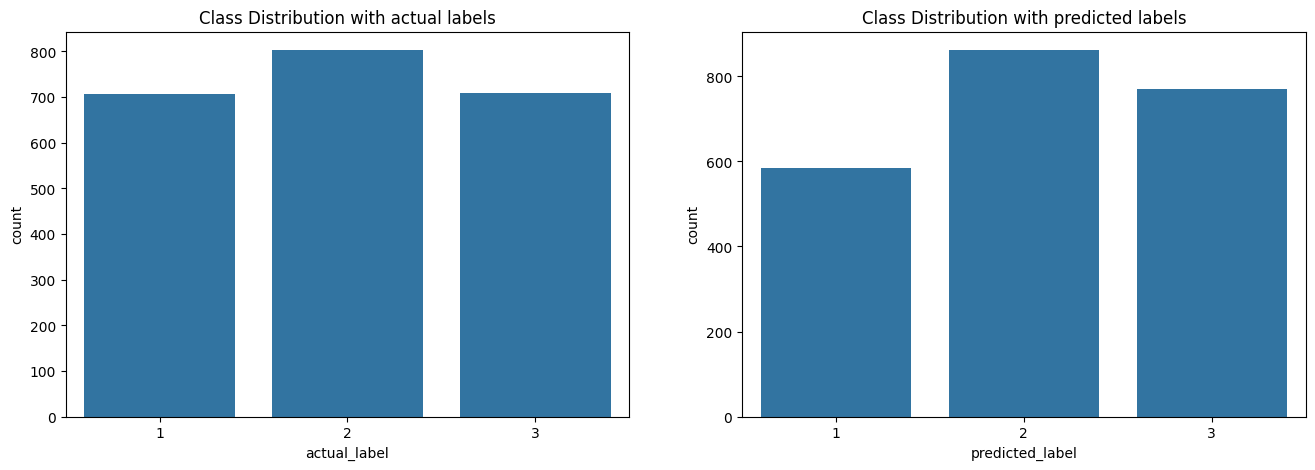

In [ ]:
# Class Distribution

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.countplot(x=actual_label, ax=axs[0])
axs[0].set_title('Class Distribution with actual labels')

sns.countplot(x=predicted_label, ax=axs[1])
axs[1].set_title('Class Distribution with predicted labels')

plt.show()

In [ ]:
# Calculate the Silhouette Score
silhouette_score_test = silhouette_score(X_test, predicted_label)

# Print or use the Silhouette Score for evaluation
print("Silhouette Score:", silhouette_score_test)

Silhouette Score: 0.58047736


In [ ]:
# Calculate Davies-Bouldin Index
db_index_test = metrics.davies_bouldin_score(X_test, predicted_label)

# Print or use the DBI for evaluation
print("Davies-Bouldin Index for Testing(Labelled) Data:", db_index_test)

Davies-Bouldin Index for Testing(Labelled) Data: 0.7621916548612481


In [ ]:
# Calculate the Adjusted Rand Index - It is the measure of the similarity of datapoints presents in the clusters and it ranges between 0 and 1
ar_index_test = adjusted_rand_score(actual_label, predicted_label)

# Print or use the ARI for evaluation
print("Adjusted Rand Index for Testing(Labelled) Data:", ar_index_test)

Adjusted Rand Index for Testing(Labelled) Data: 0.8481012296800318


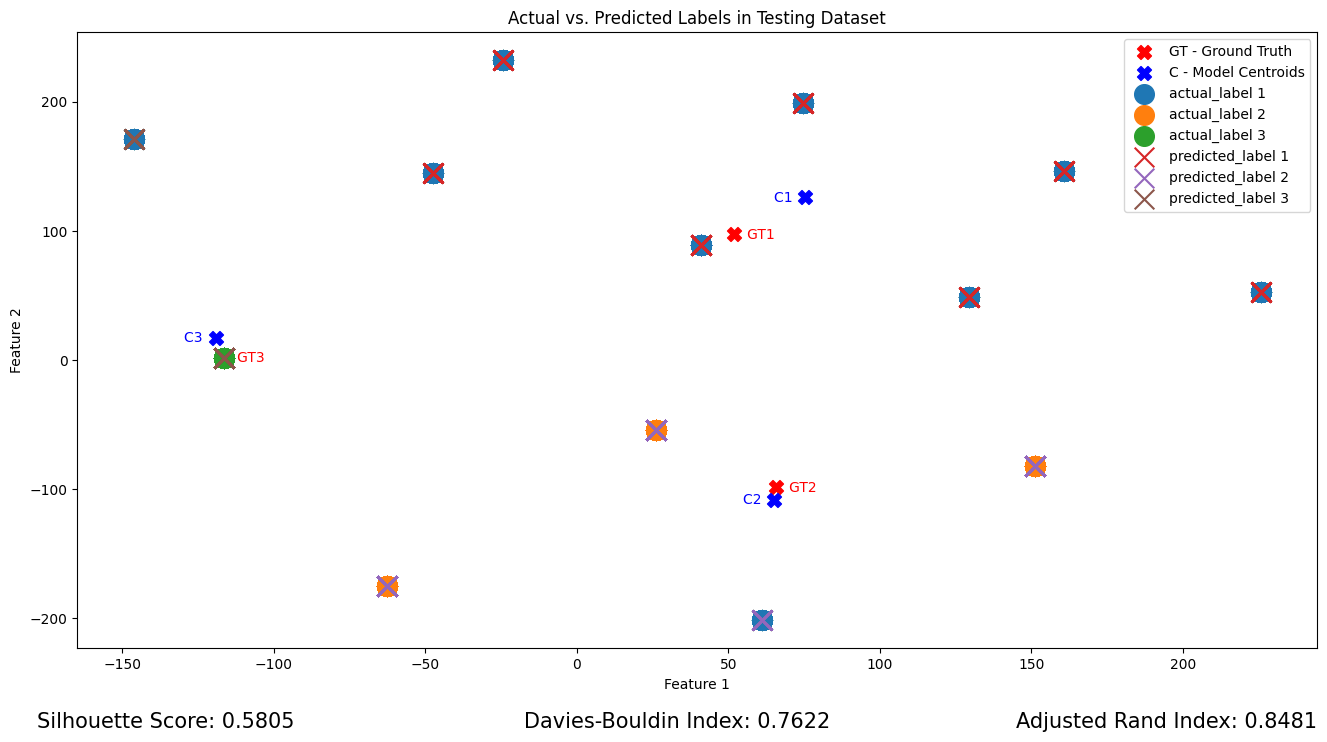

In [ ]:
# Plot the scatter plot with different colors for the testing data
plt.figure(figsize=(16, 8))

# Plot the Ground Truth Centroids
plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
for i, centroid in enumerate(GT_centroids):
    plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

# Plot the Model Centroids
plt.scatter(kmeans_model_centroids_mapped[:, 0], kmeans_model_centroids_mapped[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
for i, centroid in enumerate(kmeans_model_centroids_mapped):
    plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

# Plot Actual Labels in Testing Dataset
for cluster in range(1, len(np.unique(y_pred_aligned))+1):
    # cluster_data_test = X_test_with_labels[X_test_with_labels['actual_label'] == cluster]
    cluster_data_test = X_test_with_labels[actual_label == cluster]
    plt.scatter(cluster_data_test[data.columns[0]], cluster_data_test[data.columns[1]], s=200, label=f'actual_label {cluster}')
# sns.scatterplot(x=data.columns[0], y=data.columns[1], hue=X_test_with_labels['actual_label'], data=X_test_with_labels, palette='Set1', s=200)

# Plot Predicted Labels in Testing Dataset
for cluster in range(1, len(np.unique(y_pred_aligned))+1):
    # cluster_data_test = X_test_with_labels[X_test_with_labels['predicted_label'] == cluster]
    cluster_data_test = X_test_with_labels[predicted_label == cluster]
    plt.scatter(cluster_data_test[data.columns[0]], cluster_data_test[data.columns[1]], marker='x', s=200, label=f'predicted_label {cluster}')
# sns.scatterplot(x=data.columns[0], y=data.columns[1], hue=X_test_with_labels['predicted_label'], data=X_test_with_labels, palette='Set1', s=200, marker='x')

# Adding a footer or note
plt.figtext(0.1, 0.01, f'Silhouette Score: {silhouette_score_test:.4f}', ha="left", fontsize=15)
plt.figtext(0.5, 0.01, f'Davies-Bouldin Index: {db_index_test:.4f}', ha="center", fontsize=15)
plt.figtext(0.9, 0.01, f'Adjusted Rand Index: {ar_index_test:.4f}', ha="right", fontsize=15)

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Actual vs. Predicted Labels in Testing Dataset')
plt.legend()
# plt.xlim(-150, 150)  # Set your desired x-axis range
# plt.ylim(-150, 150)  # Set your desired y-axis range
plt.show()

<ipython-input-86-5f4a21af1cb7>:7: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter2 = plt.scatter(X_test_with_labels[data.columns[0]], X_test_with_labels[data.columns[1]], c = predicted_label, cmap='winter', edgecolors='k', alpha=0.7, s=300, marker='x')


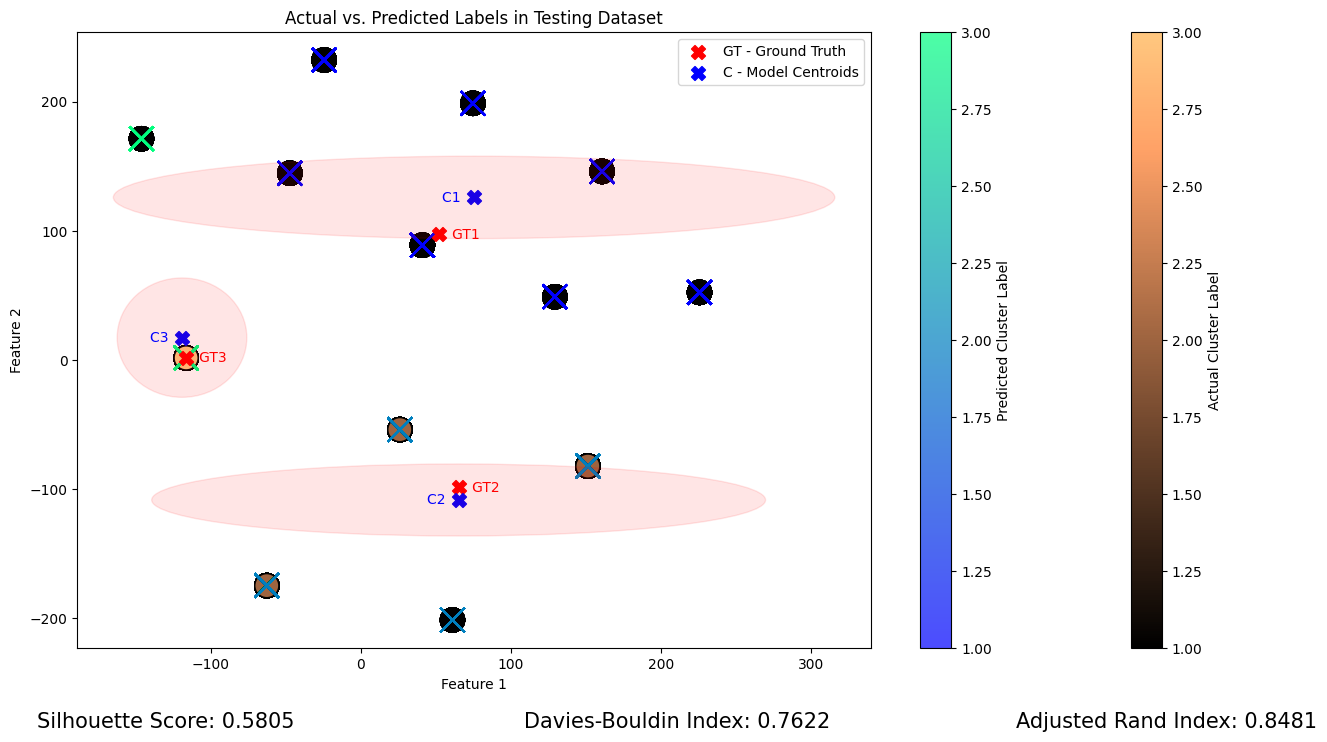

In [ ]:
# Plot the scatter plot with different colors for the testing data
plt.figure(figsize=(16, 8))

# Plot Actual Labels in Testing Dataset
scatter1 = plt.scatter(X_test_with_labels[data.columns[0]], X_test_with_labels[data.columns[1]], c = actual_label, cmap='copper', edgecolors='k', alpha=1.0, s=300, marker='o')
# Plot Predicted Labels in Testing Dataset
scatter2 = plt.scatter(X_test_with_labels[data.columns[0]], X_test_with_labels[data.columns[1]], c = predicted_label, cmap='winter', edgecolors='k', alpha=0.7, s=300, marker='x')

# Add colorbar for better interpretation of Cluster Labels
cbar1 = plt.colorbar(scatter1)
cbar1.set_label('Actual Cluster Label')
cbar2 = plt.colorbar(scatter2)
cbar2.set_label('Predicted Cluster Label')

# Plot the Ground Truth Centroids
plt.scatter(GT_centroids[:, 0], GT_centroids[:, 1], marker='X', s=100, color='red', label='GT - Ground Truth')
for i, centroid in enumerate(GT_centroids):
    plt.text(centroid[0], centroid[1], f'   GT{i+1}', color='red', fontsize=10, ha='left', va='center')

# Plot the Model Centroids
plt.scatter(kmeans_model_centroids_mapped[:, 0], kmeans_model_centroids_mapped[:, 1], marker='X', s=100, color='blue', label='C - Model Centroids')
for i, centroid in enumerate(kmeans_model_centroids_mapped):
    plt.text(centroid[0], centroid[1], f'C{i+1}   ', color='blue', fontsize=10, ha='right', va='center')

# Plot ovals around centroids to denote clusters
for i in range((len(np.unique(kmeans_model_labels_aligned)))):
    cluster_points = X_train[kmeans_model_labels_aligned == (i+1)]
    # Calculate the radii along the x and y axes
    x_radius = np.max(np.abs(cluster_points[X_train.columns[0]] - kmeans_model_centroids_mapped[i, 0]))
    y_radius = np.max(np.abs(cluster_points[X_train.columns[1]] - kmeans_model_centroids_mapped[i, 1]))
    ellipse = Ellipse((kmeans_model_centroids_mapped[i, 0], kmeans_model_centroids_mapped[i, 1]), 3.2 * x_radius, 0.6 * y_radius, color='red', alpha=0.1)
    plt.gca().add_patch(ellipse)
    # circle = Circle((kmeans_model_centroids_mapped[i, 0], kmeans_model_centroids_mapped[i, 1]), 1 * x_radius, color='red', alpha=0.1)
    # plt.gca().add_patch(circle)

# Adding a footer or note
plt.figtext(0.1, 0.01, f'Silhouette Score: {silhouette_score_test:.4f}', ha="left", fontsize=15)
plt.figtext(0.5, 0.01, f'Davies-Bouldin Index: {db_index_test:.4f}', ha="center", fontsize=15)
plt.figtext(0.9, 0.01, f'Adjusted Rand Index: {ar_index_test:.4f}', ha="right", fontsize=15)

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title('Actual vs. Predicted Labels in Testing Dataset')
plt.legend()
# plt.xlim(-150, 150)  # Set your desired x-axis range
# plt.ylim(-150, 150)  # Set your desired y-axis range
plt.show()

### **Confusion Matrix using built-in libraries**

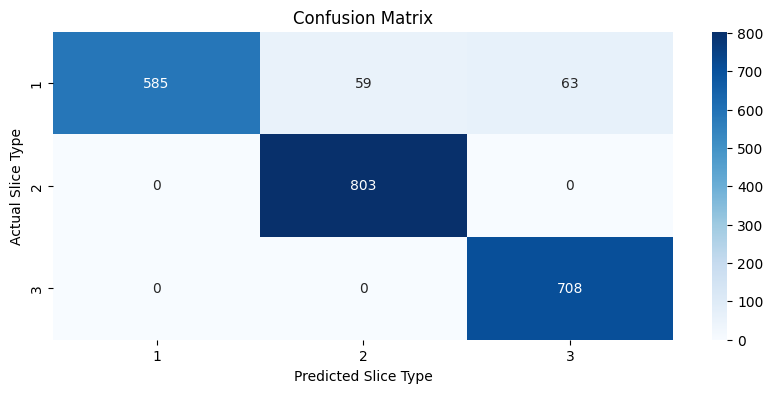


 43 43 40


In [ ]:
# Confusion Matrix
plt.figure(figsize=(10, 4))
cm = confusion_matrix(actual_label, predicted_label)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(actual_label), yticklabels=np.unique(predicted_label))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Slice Type')
plt.ylabel('Actual Slice Type')
plt.show()
print("\n", a, b, c)

In [ ]:
# Calculate accuracy
print("Accuracy", accuracy_score(actual_label, predicted_label))

# Calculate precision
print("Precision", precision_score(actual_label, predicted_label, average='weighted'))

# Calculate recall
print("Recall", recall_score(actual_label, predicted_label, average='weighted'))

# Calculate F1-score
print("F1-score", f1_score(actual_label, predicted_label, average='weighted'))

Accuracy 0.9449954914337241
Precision 0.9491371248804437
Recall 0.9449954914337241
F1-score 0.9434747828745259


In [ ]:
conf_matrix = cm
conf_matrix

array([[585,  59,  63],
       [  0, 803,   0],
       [  0,   0, 708]])

In [ ]:
# # True Positives (TP) for each class
# TP_class0 = conf_matrix[0, 0]
# TP_class1 = conf_matrix[1, 1]
# TP_class2 = conf_matrix[2, 2]

# # False Positives (FP) for each class
# FP_class0 = np.sum(conf_matrix[0, :]) - TP_class0
# FP_class1 = np.sum(conf_matrix[1, :]) - TP_class1
# FP_class2 = np.sum(conf_matrix[2, :]) - TP_class2

# # False Negatives (FN) for each class
# FN_class0 = np.sum(conf_matrix[:, 0]) - TP_class0
# FN_class1 = np.sum(conf_matrix[:, 1]) - TP_class1
# FN_class2 = np.sum(conf_matrix[:, 2]) - TP_class2

# # True Negatives (TN) for each class
# TN_class0 = np.sum(conf_matrix) - TP_class0 - FP_class0 - FN_class0
# TN_class1 = np.sum(conf_matrix) - TP_class1 - FP_class1 - FN_class1
# TN_class2 = np.sum(conf_matrix) - TP_class2 - FP_class2 - FN_class2

# # Overall True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN)
# TP = TP_class0 + TP_class1 + TP_class2
# FP = FP_class0 + FP_class1 + FP_class2
# FN = FN_class0 + FN_class1 + FN_class2
# TN = TN_class0 + TN_class1 + TN_class2

# # Display the values
# print("True Positives (TP):", TP)
# print("False Positives (FP):", FP)
# print("False Negatives (FN):", FN)
# print("True Negatives (TN):", TN)

In [ ]:
# acc = (TP + TN)/(TP + TN + FP + FN)
# pres = TP/(TP + FP)
# rec = TP/(TP + FN)
# f1 = 2 * ((pres * rec)/(pres + rec))
# print("Accuracy", acc)
# print("Precision", pres)
# print("Recall", rec)
# print("F1-score", f1)

### **Confusion Matrix using Mathematical Equation**

In [ ]:
actual_label

0       1
1       3
2       2
3       2
4       3
       ..
2213    2
2214    1
2215    2
2216    3
2217    1
Name: actual_label, Length: 2218, dtype: int64

In [ ]:
predicted_label

0       1
1       3
2       2
3       2
4       3
       ..
2213    2
2214    1
2215    2
2216    3
2217    1
Name: predicted_label, Length: 2218, dtype: int32

In [ ]:
# Initialize counts for TP, FP, FN, and TN for each class
TP_class = [0, 0, 0]
FP_class = [0, 0, 0]
FN_class = [0, 0, 0]
TN_class = [0, 0, 0]

# Iterate over each sample
for actual, predicted in zip(actual_label, predicted_label):
    # Iterate over each class
    for c in range(len(np.unique(actual_label))):
        # Increment counts based on the classification result
        if actual == c+1 and predicted == c+1:  # True Positives
            TP_class[c] += 1
        elif actual == c+1 and predicted != c+1:  # False Negatives
            FN_class[c] += 1
        elif actual != c+1 and predicted == c+1:  # False Positives
            FP_class[c] += 1
        elif actual != c+1 and predicted != c+1:  # True Negatives
            TN_class[c] += 1

# Print the results for each class
print("True Positives (TP):", TP_class)
print("False Positives (FP):", FP_class)
print("False Negatives (FN):", FN_class)
print("True Negatives (TN):", TN_class)
print("\n")

# Print the results for each class and overall
for c in range(len(np.unique(actual_label))):
    print(f"Class {c+1}:")
    print("True Positives (TP):", TP_class[c])
    print("False Positives (FP):", FP_class[c])
    print("False Negatives (FN):", FN_class[c])
    print("True Negatives (TN):", TN_class[c])
    print("\n")

# Compute overall TP, FP, FN, TN
TP = sum(TP_class)
FP = sum(FP_class)
FN = sum(FN_class)
TN = sum(TN_class)

# Print the overall results
print("Overall:")
print("True Positives (TP):", TP)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Negatives (TN):", TN)

True Positives (TP): [585, 803, 708]
False Positives (FP): [0, 59, 63]
False Negatives (FN): [122, 0, 0]
True Negatives (TN): [1511, 1356, 1447]


Class 1:
True Positives (TP): 585
False Positives (FP): 0
False Negatives (FN): 122
True Negatives (TN): 1511


Class 2:
True Positives (TP): 803
False Positives (FP): 59
False Negatives (FN): 0
True Negatives (TN): 1356


Class 3:
True Positives (TP): 708
False Positives (FP): 63
False Negatives (FN): 0
True Negatives (TN): 1447


Overall:
True Positives (TP): 2096
False Positives (FP): 122
False Negatives (FN): 122
True Negatives (TN): 4314



 Class 1:
[[ 585    0]
 [ 122 1511]] 



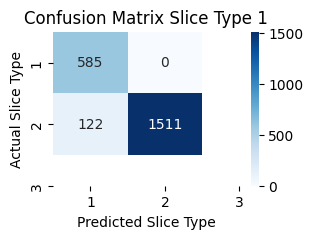


Accuracy 0.9449954914337241
Precision 1.0
Recall 0.8274398868458275
F1-score 0.9055727554179567


 Class 2:
[[ 803   59]
 [   0 1356]] 



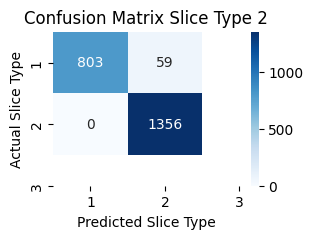


Accuracy 0.9733994589720469
Precision 0.931554524361949
Recall 1.0
F1-score 0.9645645645645645


 Class 3:
[[ 708   63]
 [   0 1447]] 



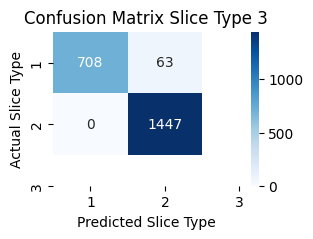


Accuracy 0.9715960324616771
Precision 0.9182879377431906
Recall 1.0
F1-score 0.9574036511156186



In [ ]:
# Create the confusion matrix array for each class
for c in range(len(np.unique(actual_label))):
    print("\n", f"Class {c+1}:")
    conf_matrix = np.array([
        [TP_class[c], FP_class[c]],
         [FN_class[c], TN_class[c]]
        ])
    print(conf_matrix, "\n")
    # Confusion Matrix
    plt.figure(figsize=(3, 2))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(actual_label), yticklabels=np.unique(predicted_label))
    plt.title(f'Confusion Matrix Slice Type {c+1}')
    plt.xlabel('Predicted Slice Type')
    plt.ylabel('Actual Slice Type')
    plt.show()
    print()
    accuracy = (TP_class[c] + TN_class[c])/(TP_class[c] + TN_class[c] + FP_class[c] + FN_class[c])
    precision = TP_class[c]/(TP_class[c] + FP_class[c])
    recall = TP_class[c]/(TP_class[c] + FN_class[c])
    f1score = 2 * ((precision * recall)/(precision + recall))
    print("Accuracy", accuracy)
    print("Precision", precision)
    print("Recall", recall)
    print("F1-score", f1score)
    print()

In [ ]:
# Overall
overall_accuracy = (TP + TN)/(TP + TN + FP + FN)
overall_precision = TP/(TP + FP)
overall_recall = TP/(TP + FN)
overall_f1score = 2 * ((precision * recall)/(precision + recall))
print("Accuracy", overall_accuracy)
print("Precision", overall_precision)
print("Recall", overall_recall)
print("F1-score", overall_f1score)

Accuracy 0.9633303276224827
Precision 0.9449954914337241
Recall 0.9449954914337241
F1-score 0.9574036511156186
